### New Notebook for RNN and it's speciality over ANN or Normal feed-forward Network

### This Notebook will Contain a lot of Notes and points of remember with some code to demonstrate the same

Note 1 📝
RNN can Handle sequential and series kind of data which can not be used for training in normal ANN

Note 2 📝
RNN treats sequential and series data as a whole where in case of Normal feed forward networks we every sequence becomes indipendent of each other
while passing through hidden layer which breaks the useful meaning from data

### RNN image

In [ ]:
from google.colab import files
from IPython.display import Image

files.upload()
print("done")

Saving Corona_NLP_test.csv to Corona_NLP_test.csv
Saving Corona_NLP_train.csv to Corona_NLP_train.csv
done


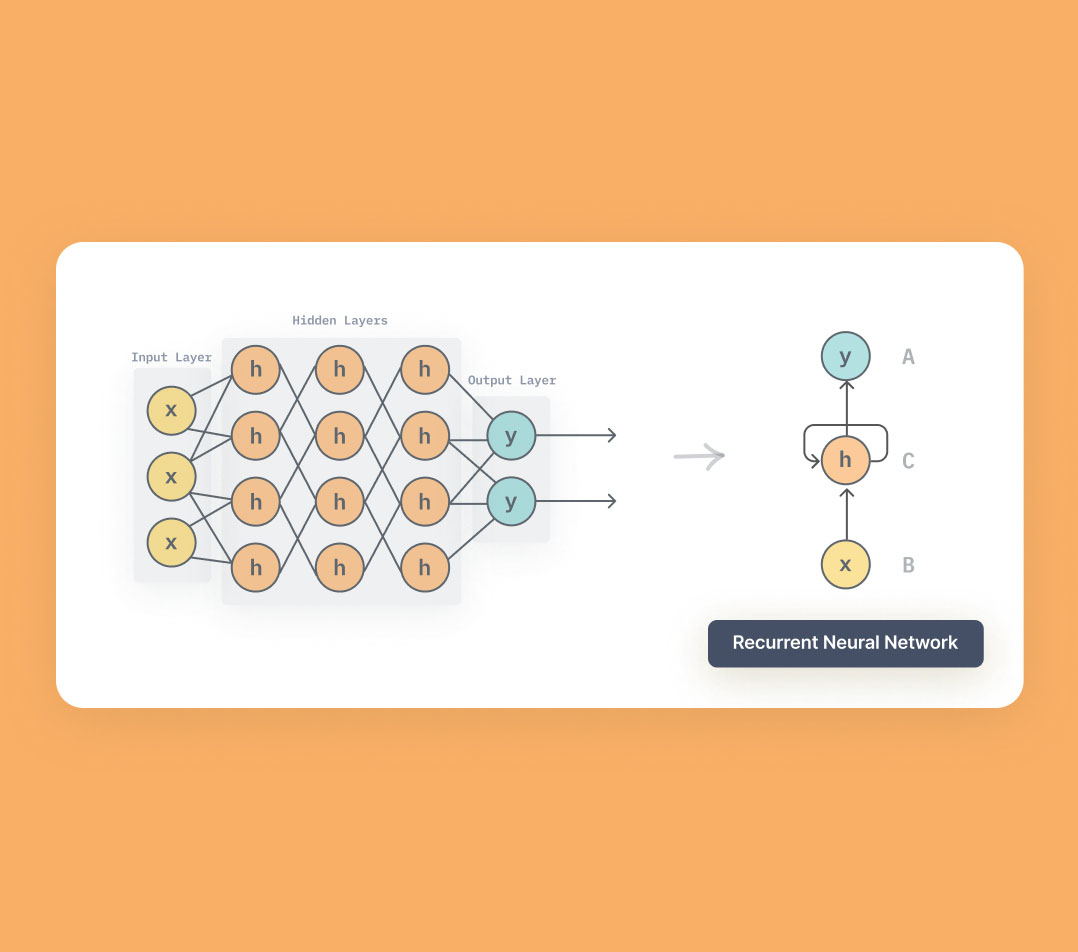

In [ ]:
Image('rnn.jpeg',height=640,width=700)

Left side of the image shows the unfolded image of RNN and rigth side shows the folded image

### Let's see the Normal Feed Forward Netowrk or simple ANN

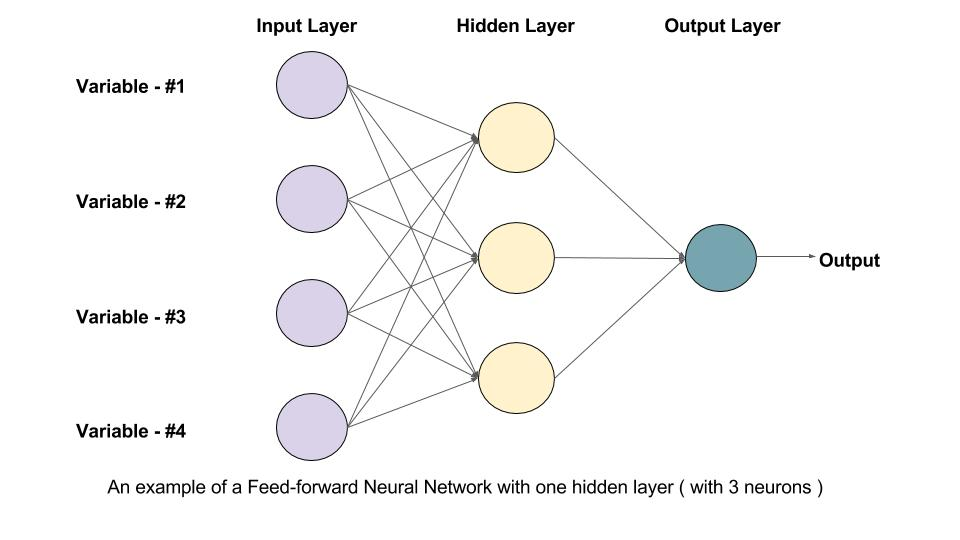

In [ ]:
Image('mlp-diagram.jpg',height=640,width=700)

### Demonstration

### Let's Code something 😎😎

### Importing modules

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import csv

Pandas will not be working for non - 'utf-8' encoded values in the dataset so instead I will use csv module

In [ ]:
train_data = []
train_label = []
test_data = []

In [ ]:
with open('Corona_NLP_train.csv',"r") as file1:
  train_reader = csv.reader(file1,delimiter=',')
  try:
    for r in train_reader:
      train_data.append(r[4])
      train_label.append(r[5])
  except:
    pass

In [ ]:
r = 0
with open('Corona_NLP_test.csv',"r") as file2:
  test_reader = csv.reader(file2,delimiter=',')
  try:
    for r in test_reader:
      test_data.append(r[4])
  except:
    pass

In [ ]:
len(train_data),len(train_label),len(test_data)

(15252, 15252, 3799)

In [ ]:
train_data.pop(0)

'OriginalTweet'

### First 5 item in the train set

In [ ]:
train_data[:5]

['@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8',
 'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order',
 'Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P',
 "My food stock is not the only one which is empty...\n\n\n\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \n\nStay calm, stay safe.\n\n\n\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",
 "Me, ready to go at supermarket during the #COVID19 outbreak.\n\n\n\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please,

In [ ]:
train_label.pop(0)

'Sentiment'

In [ ]:
train_label[:5]

['Neutral', 'Positive', 'Positive', 'Positive', 'Extremely Negative']

In [ ]:
test_data.pop(0)

'OriginalTweet'

In [ ]:
test_data[:5]

['TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1',
 "When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",
 'Find out how you can protect yourself and loved ones from #coronavirus. ?',
 '#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event?\n\n\n\nhttps://t.co/IASiReGPC4\n\n\n\n#QAnon #QAnon2018 #QAnon2020 \n\n#Election2020 #CDC https://t.co/29isZOewxu',
 '#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News  #Corvid19 #7NewsMelb #dunnypapergate #Costco    One week everyon

### Data Preprocessing

In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words=1024,oov_token='<OOV>')
tokenizer.fit_on_texts(train_data)

In [ ]:
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'the': 2, 'to': 3, 'and': 4, 'of': 5, 't': 6, 'co': 7, 'https': 8, 'a': 9, 'in': 10, 'coronavirus': 11, '19': 12, 'covid': 13, 'for': 14, 'is': 15, 'are': 16, 'i': 17, 'you': 18, 'on': 19, 'this': 20, 'at': 21, 'store': 22, 'food': 23, 'supermarket': 24, 'grocery': 25, 'prices': 26, 'people': 27, 'we': 28, 'have': 29, 'that': 30, 'be': 31, 'with': 32, 'it': 33, 'all': 34, 'as': 35, 'not': 36, 'from': 37, 'my': 38, 'amp': 39, 'will': 40, 'panic': 41, 'your': 42, 'they': 43, 'out': 44, 'covid19': 45, 'up': 46, 'if': 47, 'but': 48, 'or': 49, 'our': 50, 'can': 51, 'no': 52, 'shopping': 53, 'so': 54, 'has': 55, 'more': 56, 'their': 57, 'get': 58, 'consumer': 59, 'need': 60, 'who': 61, 'now': 62, 'online': 63, 'by': 64, 'just': 65, 'how': 66, 'about': 67, 'buying': 68, 'what': 69, 'during': 70, 'like': 71, 'workers': 72, 'was': 73, 'do': 74, 'go': 75, 'time': 76, 'there': 77, 'stock': 78, 'some': 79, 'us': 80, 'when': 81, 'home': 82, 'shelves': 83, 'an': 84, 'me': 85, 'covid2019

In [ ]:
train_sequence = tokenizer.texts_to_sequences(train_data)
train_padded = pad_sequences(train_sequence,maxlen=100)

In [ ]:
train_padded[:5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   1,   1,   1,   1,   8,   6,   7,   1,   4,
          8,   6,   7,   1,   4,   8,   6,   7,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 557, 903,   3,
         42,   1, 305,   3,   1,   1,   1,   1, 499, 422,  32,   1,   

In [ ]:
test_sequence = tokenizer.texts_to_sequences(test_data)
test_padded = pad_sequences(test_sequence,maxlen=100)

In [ ]:
test_padded[:5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   1, 136,   1,   1, 125,  24,  83,   1,   1,
         10,   1, 550,  44,  63,   1,   1,   1,  35,  11,   1, 362,  78,
         46,   8,   6,   7,   1,   8,   6,   7,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81,  17,   1, 207, 146, 236,  21,   1,   1,  17,   1,   3, 30

In [ ]:
train_label_uq = []
for i in train_label:
  if i not in train_label_uq:
    train_label_uq.append(i)

print(train_label_uq),print(len(train_label_uq))

['Neutral', 'Positive', 'Extremely Negative', 'Negative', 'Extremely Positive']
5


(None, None)

In [ ]:
len(train_data)-3050

12201

In [ ]:
train_label_encoded = []
for j in train_label:
  if j == 'Neutral':
    train_label_encoded.append(0)
  if j == 'Positive':
    train_label_encoded.append(1)
  if j == 'Extremely Negative':
    train_label_encoded.append(2)
  if j == 'Negative':
    train_label_encoded.append(3)
  if j == 'Extremely Positive':
    train_label_encoded.append(4)


In [ ]:
len(train_label)==len(train_label_encoded)

True

In [ ]:
X_train = train_padded[0:12200]
X_test = train_padded[12200:]
Y_train = train_label_encoded[0:12200]
Y_test = train_label_encoded[12200:]

In [ ]:
len(X_train),len(X_test),len(Y_train),len(Y_test)

(12200, 3051, 12200, 3051)

### Let's see how the Normal ANN behaves to sequential Data

### Let's create the model and train and test it

In [ ]:
model_Ann = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(24,activation="relu"),
    tf.keras.layers.Dense(5,activation="softmax") #multi class classification
])

In [ ]:
model_Ann.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model_Ann.fit(np.array(X_train),np.array(Y_train),epochs=10,validation_data=(np.array(X_test),np.array(Y_test)),verbose=2)

Epoch 1/10
382/382 - 3s - loss: 9.3563 - accuracy: 0.2442 - val_loss: 1.6468 - val_accuracy: 0.2724 - 3s/epoch - 7ms/step
Epoch 2/10
382/382 - 1s - loss: 1.5935 - accuracy: 0.2659 - val_loss: 1.6055 - val_accuracy: 0.2727 - 794ms/epoch - 2ms/step
Epoch 3/10
382/382 - 1s - loss: 1.5792 - accuracy: 0.2694 - val_loss: 1.5957 - val_accuracy: 0.2724 - 828ms/epoch - 2ms/step
Epoch 4/10
382/382 - 1s - loss: 1.5755 - accuracy: 0.2696 - val_loss: 1.5981 - val_accuracy: 0.2730 - 788ms/epoch - 2ms/step
Epoch 5/10
382/382 - 1s - loss: 1.5734 - accuracy: 0.2705 - val_loss: 1.5916 - val_accuracy: 0.2747 - 805ms/epoch - 2ms/step
Epoch 6/10
382/382 - 1s - loss: 1.5756 - accuracy: 0.2689 - val_loss: 1.5946 - val_accuracy: 0.2730 - 794ms/epoch - 2ms/step
Epoch 7/10
382/382 - 1s - loss: 1.5744 - accuracy: 0.2689 - val_loss: 1.5871 - val_accuracy: 0.2737 - 771ms/epoch - 2ms/step
Epoch 8/10
382/382 - 1s - loss: 1.5768 - accuracy: 0.2688 - val_loss: 1.5887 - val_accuracy: 0.2720 - 777ms/epoch - 2ms/step
Epo

### Now Let's see how RNN behaves with sequence and series data

### Model for RNN

In [ ]:
model_Rnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000,16,input_length=100),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation="relu"),
    tf.keras.layers.Dense(5,activation='softmax')
])

In [ ]:
model_Rnn.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])

In [ ]:
history_Rnn = model_Rnn.fit(np.array(X_train),np.array(Y_train),epochs=10,validation_data=(np.array(X_test),np.array(Y_test)),verbose=2)

Epoch 1/10
382/382 - 3s - loss: 1.5709 - accuracy: 0.2657 - val_loss: 1.5363 - val_accuracy: 0.2747 - 3s/epoch - 7ms/step
Epoch 2/10
382/382 - 2s - loss: 1.5027 - accuracy: 0.3246 - val_loss: 1.4822 - val_accuracy: 0.3274 - 2s/epoch - 5ms/step
Epoch 3/10
382/382 - 2s - loss: 1.4527 - accuracy: 0.3616 - val_loss: 1.4406 - val_accuracy: 0.3543 - 2s/epoch - 5ms/step
Epoch 4/10
382/382 - 2s - loss: 1.3782 - accuracy: 0.4053 - val_loss: 1.3535 - val_accuracy: 0.4156 - 2s/epoch - 5ms/step
Epoch 5/10
382/382 - 2s - loss: 1.2875 - accuracy: 0.4480 - val_loss: 1.2807 - val_accuracy: 0.4562 - 2s/epoch - 6ms/step
Epoch 6/10
382/382 - 2s - loss: 1.2146 - accuracy: 0.4852 - val_loss: 1.2367 - val_accuracy: 0.4779 - 2s/epoch - 5ms/step
Epoch 7/10
382/382 - 2s - loss: 1.1602 - accuracy: 0.5185 - val_loss: 1.1926 - val_accuracy: 0.4962 - 2s/epoch - 5ms/step
Epoch 8/10
382/382 - 2s - loss: 1.1201 - accuracy: 0.5400 - val_loss: 1.1692 - val_accuracy: 0.5077 - 2s/epoch - 4ms/step
Epoch 9/10
382/382 - 2s 

### Ok I trained it for less epoch and much less intuition has been done but, still produces a better result

You can try it for more epochs or further intuition with the model for a better performance

### Just a little experiment with our trained model

In [ ]:
sentence = ['Heello world']
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences,maxlen=100,padding='post',truncating='post')

In [ ]:
print(model_Rnn.predict(padded))

1/1 [==============================] - 0s 179ms/step
[[0.51204515 0.21207477 0.0345065  0.22421935 0.01715421]]


In [ ]:
train_label_uq

['Neutral', 'Positive', 'Extremely Negative', 'Negative', 'Extremely Positive']

### So as for now it is showing Neutral value

### It's Great we reached here 😍😊😎😮‍💨